In [1]:
import numpy as np
import pandas as pd

In [2]:
# read batting data into df
df = pd.read_csv('batting.csv')
# preview top 5 rows
df.head()

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [20]:
# establish column with playerID + year for lookup
df['player_year'] = df['playerID'] + " " + df['yearID'].map(str)

In [3]:
# add calculated fields
df['OB'] = df['H']+df['BB']+df['IBB']+df['SH']+df['SF']
df['OBP'] = df['OB']/df['AB']
df['PA']= df['AB']+df['BB']+df['IBB']+df['SH']+df['SF']

## 1. Players with at least 500 career home runs

In [49]:
# Group the df by playerID and sum HR
player_HR = df.groupby(['playerID'], as_index = False).agg({'nameFirst': 'first', 'nameLast': 'first', 'birthYear': 'first', 'HR': sum})
# Filter to HR sum of greater than 600
player_HR = player_HR[player_HR['HR'] >= 500].sort_values(by='HR', ascending = False)
player_HR
player_HR = pd.DataFrame(player_HR.set_index(['nameLast', 'nameFirst'])['HR'])
player_HR

,,HR
nameLast,nameFirst,
Bonds,Barry,762
Aaron,Hank,755
Ruth,Babe,714
Rodriguez,Alex,696
Mays,Willie,660
Griffey,Ken,630
Thome,Jim,612
Sosa,Sammy,609
Pujols,Albert,591


In [7]:
%matplotlib inline

Text(0.5,0,'Player')

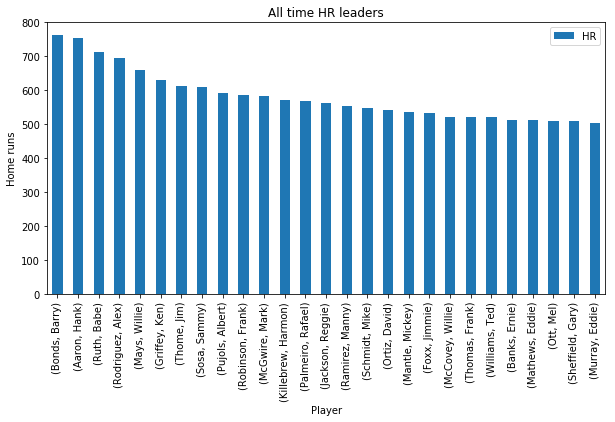

In [103]:
plt.figure(figsize=(12,6))
ax = player_HR.plot.bar(figsize=(10,5))
ax.set_title("All time HR leaders")
ax.set_ylabel("Home runs")
ax.set_xlabel("Player")

## 2. Adam Jones' Home Runs

In [60]:
jones = df[df['playerID'] == "jonesad01"].groupby(['yearID']).agg({'H': sum, 'HR': sum})
jones

,H,HR
yearID,,
2006,16,1
2007,16,2
2008,129,9
2009,131,19
2010,165,19
2011,159,25
2012,186,32
2013,186,33
2014,181,29


In [61]:
y1 = jones['HR']
y2 = jones['H']

In [14]:
import pandas as pd
import numpy as np
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

import cufflinks as cf

# For Notebooks
init_notebook_mode(connected=True)

# For offline use
cf.go_offline()

2.3.0


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


Text(0.5,0,'Home runs')

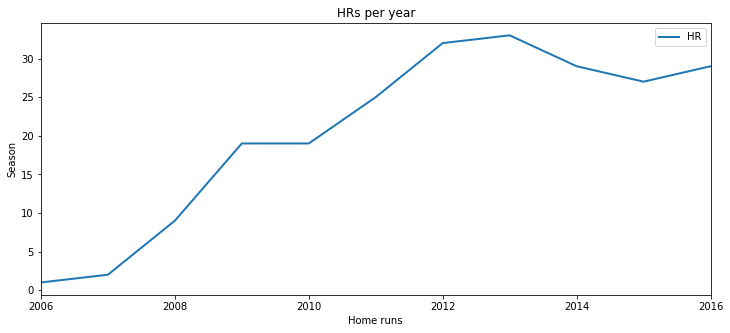

In [111]:
jones.plot.line(x=jones.index,y='HR',figsize=(12,5),lw=2)
plt.title('HRs per year')
plt.ylabel('Season')
plt.xlabel('Home runs')

In [64]:
jones2 = df[df['playerID'] == "jonesad01"].groupby(['yearID'], as_index= False).agg({'AB': sum, 'H': sum})
jones2

,yearID,AB,H
0,2006,74,16
1,2007,65,16
2,2008,477,129
3,2009,473,131
4,2010,581,165
5,2011,567,159
6,2012,648,186
7,2013,653,186
8,2014,644,181
9,2015,546,147


## 3. Jones Hits vs. At-bats

In [68]:
import pandas as pd

In [73]:
import matplotlib.pyplot as plt

In [75]:
x = pd.Series(jones2['yearID'])
y1 = pd.Series(jones2['AB'])
y2 = pd.Series(jones2['H'])

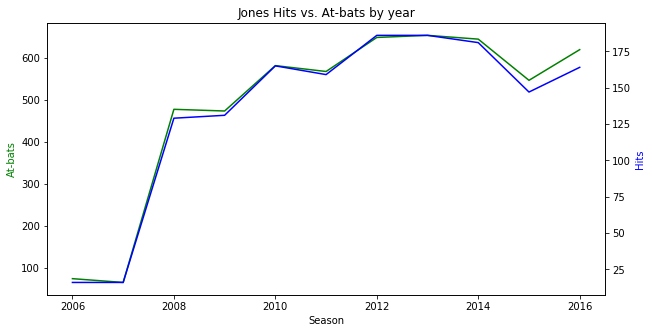

In [82]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Season')
ax1.set_ylabel('At-bats', color='g')
ax2.set_ylabel('Hits', color='b')

plt.title('Jones Hits vs. At-bats by year')

plt.show()

## 4. Players may exceed 50 stolen bases for multiple seasons what is the distribution of seasons by player of where 50+ bases are stolen.

In [22]:
# aggregate stolen bases by player and season
sb_season = df.groupby(['player_year']).agg({'yearID': 'first', 'playerID': 'first', 'nameFirst': 'first', 'nameLast': 'first', 'birthYear': 'first', 'SB': sum})
# pull player and season with more than 100 SBs
sb_season = sb_season[sb_season['SB']>=50]
sb_season = sb_season.groupby(['nameLast', 'nameFirst'])['yearID'].agg(['count'])
sb_season

,,count
nameLast,nameFirst,
Alomar,Roberto,2
Altuve,Jose,1
Anderson,Brady,1
Andrews,Ed,2
Aparicio,Luis,4
Baylor,Don,1
Bescher,Bob,4
Biggio,Craig,1
Bonds,Barry,1


In [109]:
sb_season['count'].iplot(kind='hist', title='Distribution of Number of Seasons Player Makes 50+ SBs')

## 5. Distribution of yearly HRs for players in each league

In [46]:
years2000 = df[(df.yearID >= 2000) & (df.yearID < 2010)]
league_HR = years2000.groupby(['lgID', 'yearID', 'playerID'], as_index = False).agg({'HR':sum})
league_HR

,lgID,yearID,playerID,HR
0,AL,2000,abbotje01,3
1,AL,2000,abbotpa01,0
2,AL,2000,alcanis01,4
3,AL,2000,alexama02,4
4,AL,2000,alicelu01,6
5,AL,2000,allench01,0
6,AL,2000,allendu01,2
7,AL,2000,alomaro01,19
8,AL,2000,alomasa02,7
9,AL,2000,alvarga01,0


In [42]:
import seaborn as sns
%matplotlib inline

Text(0.5,0,'Season')

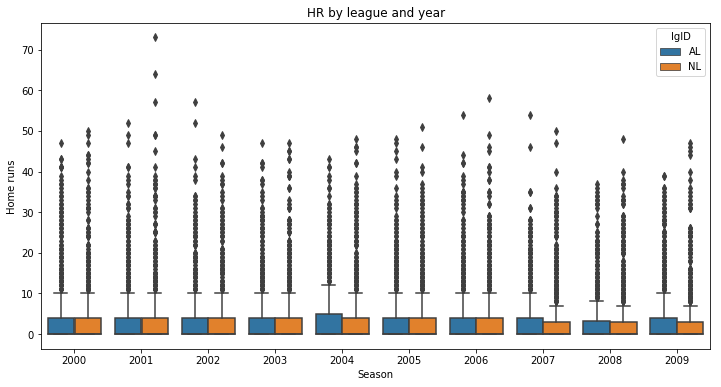

In [96]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='yearID',y='HR', hue='lgID', data=league_HR)
ax.set_title("HR by league and year")
ax.set_ylabel("Home runs")
ax.set_xlabel("Season")